1. Importing Libraries 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [15]:
pd.__version__

'2.3.0'

Importing dataset

In [16]:
df = pd.read_csv('data/raw/International_Education_Costs.csv')


In [17]:
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [18]:
   # Show the 5 rows with the highest tuition values
highest_tuition = df.sort_values('Tuition_USD', ascending=False).head()
highest_tuition

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
877,USA,New York,Columbia University,Data Science,Master,2.0,62000,100.0,2500,160,1500,1.0
412,USA,New York,Columbia University,Economics,Master,2.0,62000,100.0,2500,160,1500,1.0
891,USA,Chicago,University of Chicago,Artificial Intelligence,Master,2.0,58000,84.1,1900,160,1500,1.0
397,USA,Boston,MIT,Computer Science,Master,2.0,58000,82.1,2100,160,1500,1.0
452,USA,Chicago,University of Chicago,Data Science,Master,2.0,58000,84.1,1900,160,1500,1.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [6]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [7]:
# Checking for missing values
df.isnull().sum().sort_values(ascending=False)


Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

Profile cost distributions by Country, City, Level, and Program.

Tuition by Country with boxplot visualization

/var/folders/xp/7swlw_j92t76gzg3sps6s6kh0000gn/T/ipykernel_20785/2183303833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Country'].isin(top_countries)],


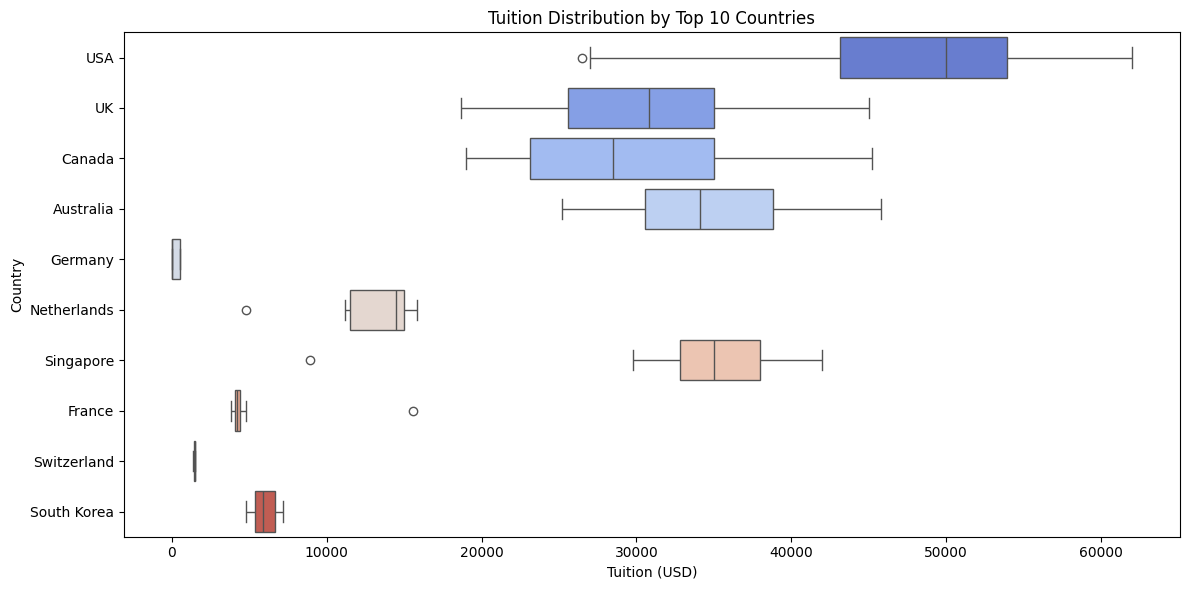

In [8]:
top_countries = df['Country'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Country'].isin(top_countries)],
            x='Tuition_USD', y='Country', palette="coolwarm")
plt.title('Tuition Distribution by Top 10 Countries')
plt.xlabel('Tuition (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Cursor output when asked for better vizualization to show skew and median values

/var/folders/xp/7swlw_j92t76gzg3sps6s6kh0000gn/T/ipykernel_20785/3795113219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


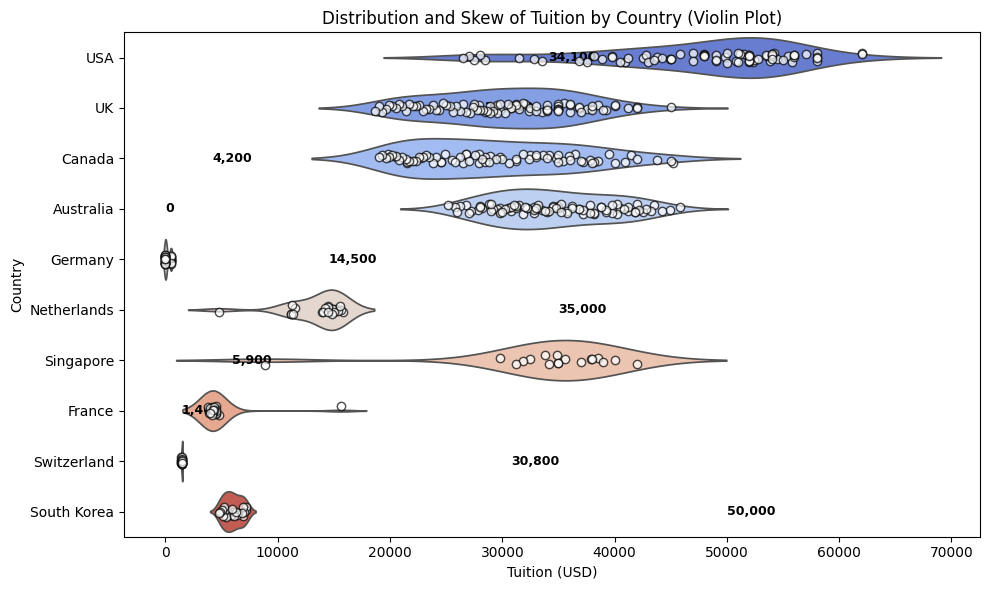

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    data=df[df['Country'].isin(top_countries)],
    x='Tuition_USD', y='Country', palette="coolwarm", inner=None
)

# Calculate and annotate medians
medians = (
    df[df['Country'].isin(top_countries)]
    .groupby('Country')['Tuition_USD']
    .median()
)

for i, country in enumerate(medians.index):
    median_val = medians[country]
    ax.text(
        median_val, i, f'{median_val:,.0f}',
        va='center', ha='left', fontweight='bold', color='black', fontsize=9
    )

# Optionally, overlay a white dot for the median
sns.stripplot(
    data=df[df['Country'].isin(top_countries)],
    x='Tuition_USD', y='Country', color='white', size=6,
    marker='o', linewidth=1, edgecolor='black',
    order=medians.index,
    alpha=0.7
)

plt.title('Distribution and Skew of Tuition by Country (Violin Plot)')
plt.xlabel('Tuition (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

/var/folders/xp/7swlw_j92t76gzg3sps6s6kh0000gn/T/ipykernel_20785/3956964223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['City'].isin(top_cities)],


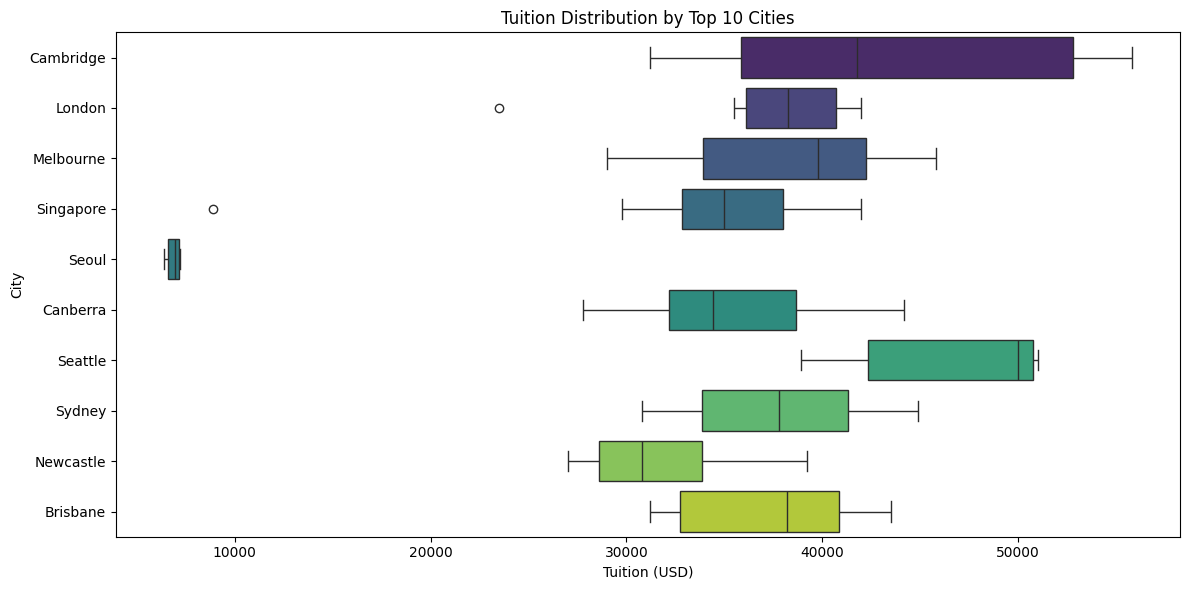

In [10]:
top_cities = df['City'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['City'].isin(top_cities)],
            x='Tuition_USD', y='City', palette="viridis")
plt.title('Tuition Distribution by Top 10 Cities')
plt.xlabel('Tuition (USD)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


/var/folders/xp/7swlw_j92t76gzg3sps6s6kh0000gn/T/ipykernel_20785/225168337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Level', y='Tuition_USD', palette="Set2")


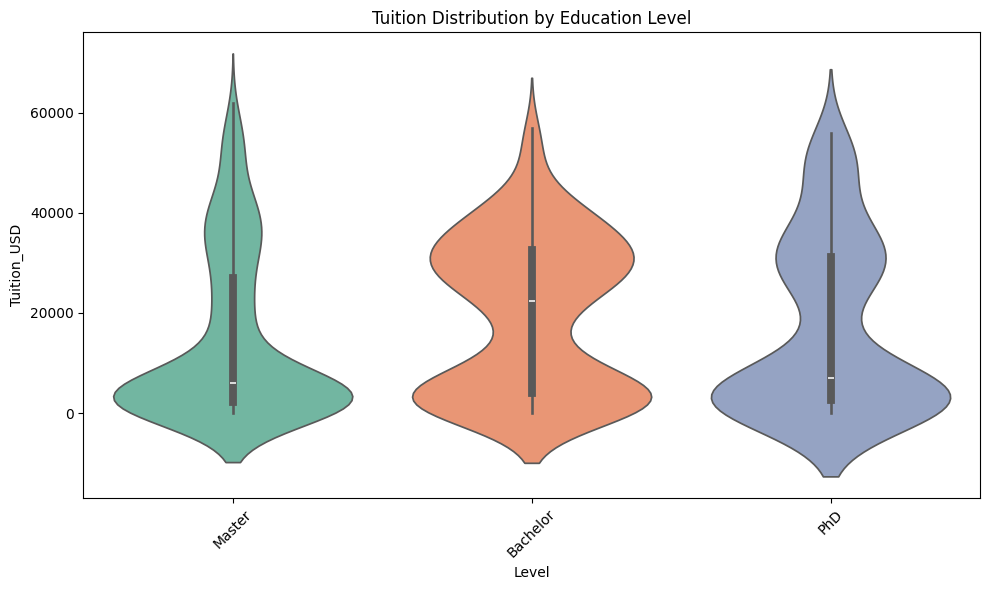

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Level', y='Tuition_USD', palette="Set2")
plt.title('Tuition Distribution by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/xp/7swlw_j92t76gzg3sps6s6kh0000gn/T/ipykernel_20785/3645246806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Program'].isin(top_programs)],


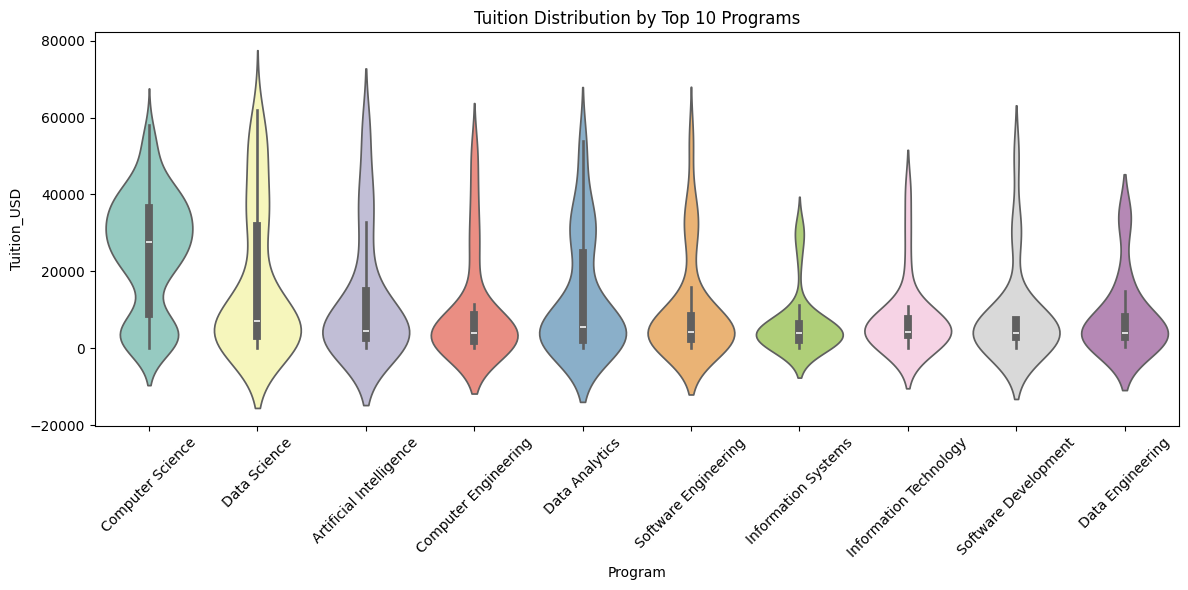

In [12]:
top_programs = df['Program'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['Program'].isin(top_programs)],
              x='Program', y='Tuition_USD', palette="Set3")
plt.title('Tuition Distribution by Top 10 Programs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


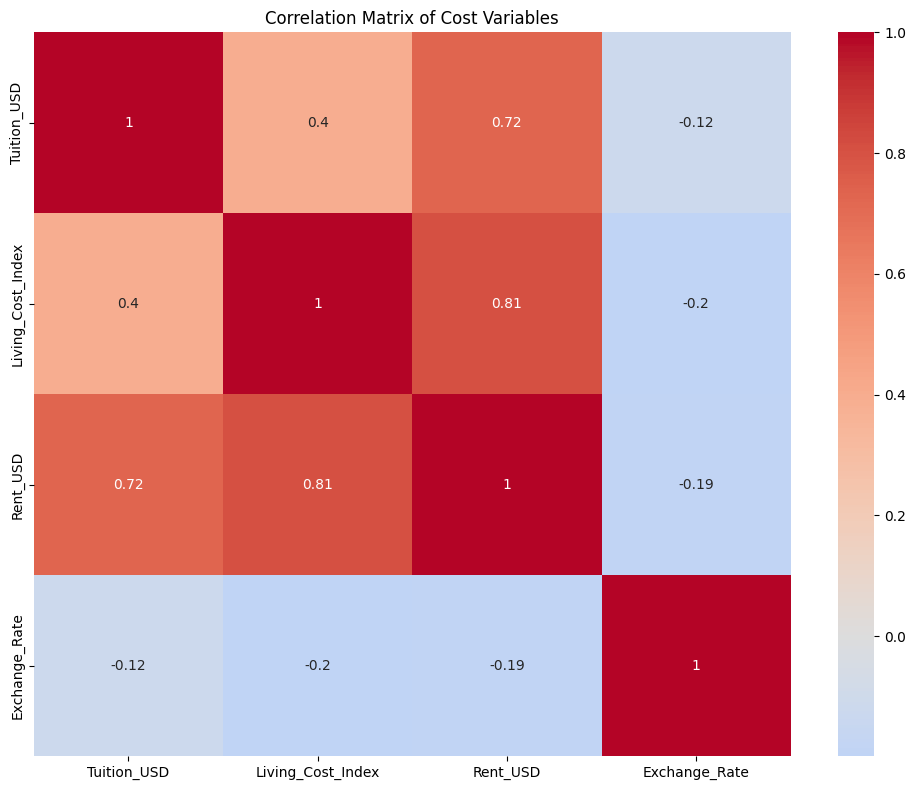

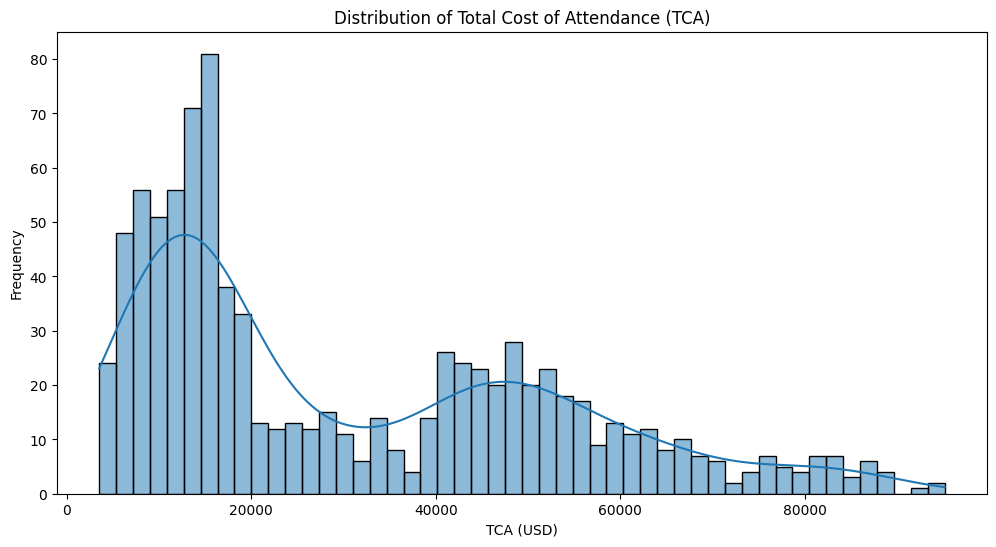

In [13]:
# 1. Correlation Analysis
correlation_matrix = df[['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Exchange_Rate']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cost Variables')
plt.tight_layout()
plt.show()

# 2. Calculate Total Cost of Attendance (TCA)
df['TCA'] = df['Tuition_USD'] + (df['Rent_USD'] * 12) + df['Visa_Fee_USD'] + (df['Insurance_USD'] * df['Duration_Years'])

# 3. TCA Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['TCA'], bins=50, kde=True)
plt.title('Distribution of Total Cost of Attendance (TCA)')
plt.xlabel('TCA (USD)')
plt.ylabel('Frequency')
plt.show()